In [1]:
# Importing necessary libraries
import random
from collections import Counter
from typing import Callable
from typing import List, Tuple

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
def calculate_giant_component_size(graph: nx.Graph) -> float:
    """Calculate the relative size of the largest connected component in the graph.

    Args:
        graph (nx.Graph): The input graph.

    Returns:
        float: The size of the largest connected component relative to the graph size.
    """
    if len(graph) > 0:
        largest_component = max(nx.connected_components(graph), key=len)
        return len(largest_component) / len(graph)
    return 0

def random_failure(graph: nx.Graph) -> str:
    """Select a random node for removal."""
    return random.choice(list(graph.nodes()))

def highest_degree(graph: nx.Graph, degree_dict: dict) -> str:
    """Select the node with the highest degree for removal."""
    return max(graph.nodes(), key=lambda node: degree_dict[node])

def highest_centrality(graph: nx.Graph, centrality_dict: dict) -> str:
    """Select the node with the highest centrality for removal."""
    return max(graph.nodes(), key=lambda node: centrality_dict[node])

def highest_betweenness(graph: nx.Graph, betweenness_dict: dict) -> str:
    """Select the node with the highest betweenness centrality for removal."""
    return max(graph.nodes(), key=lambda node: betweenness_dict[node])

def highest_closeness(graph: nx.Graph, closeness_dict: dict) -> str:
    """Select the node with the highest closeness centrality for removal."""
    return max(graph.nodes(), key=lambda node: closeness_dict[node])

def combined_degree_centrality(graph: nx.Graph, degree_dict: dict, centrality_dict: dict) -> str:
    """Select the node based on a combination of degree and centrality metrics."""
    return max(graph.nodes(), key=lambda node: degree_dict[node] + centrality_dict[node])

def attack_graph(
    graph: nx.Graph, 
    strategy: Callable[[nx.Graph], str], 
    label: str, 
    degree_dict: dict = None, 
    centrality_dict: dict = None, 
    betweenness_dict: dict = None, 
    closeness_dict: dict = None,
    steps: int = 30
) -> List[float]:
    """Execute a graph attack using a specified strategy and log the results.

    Args:
        graph (nx.Graph): The graph to attack.
        strategy (Callable[[nx.Graph], str]): The attack strategy function.
        label (str): The label for logging purposes.
        degree_dict (dict, optional): Precomputed degree data. Defaults to None.
        centrality_dict (dict, optional): Precomputed centrality data. Defaults to None.
        betweenness_dict (dict, optional): Precomputed betweenness data. Defaults to None.
        closeness_dict (dict, optional): Precomputed closeness data. Defaults to None.
        steps (int): Number of attack steps to execute. Defaults to 30.

    Returns:
        List[float]: Relative sizes of the largest component after each step.
    """
    giant_component_sizes = []
    initial_size = graph.number_of_nodes()

    print(f"\nStarting attack: {label}")

    for step in range(steps):
        if len(graph) == 0:
            break

        if strategy == highest_degree and degree_dict:
            node_to_remove = highest_degree(graph, degree_dict)
        elif strategy == highest_centrality and centrality_dict:
            node_to_remove = highest_centrality(graph, centrality_dict)
        elif strategy == highest_betweenness and betweenness_dict:
            node_to_remove = highest_betweenness(graph, betweenness_dict)
        elif strategy == highest_closeness and closeness_dict:
            node_to_remove = highest_closeness(graph, closeness_dict)
        elif strategy == combined_degree_centrality and degree_dict and centrality_dict:
            node_to_remove = combined_degree_centrality(graph, degree_dict, centrality_dict)
        else:
            node_to_remove = random_failure(graph)

        print(f"Step {step + 1}: Removing node {node_to_remove}")
        graph.remove_node(node_to_remove)

        size = calculate_giant_component_size(graph)
        giant_component_sizes.append(size)
        print(f"Giant component size after step {step + 1}: {size:.4f}")

    return giant_component_sizes

def plot_attack_results(graph: nx.Graph, steps: int = 30):
    """Run multiple attack strategies and visualize their effectiveness.

    Args:
        graph (nx.Graph): The graph to attack.
        steps (int): Number of attack steps to execute.
    """
    # Precompute metrics for faster processing
    degree_dict = dict(graph.degree())
    centrality_dict = nx.degree_centrality(graph)
    betweenness_dict = nx.betweenness_centrality(graph)
    closeness_dict = nx.closeness_centrality(graph)

    strategies = [
        (random_failure, "Random Failure"),
        (highest_degree, "Highest Degree"),
        (highest_centrality, "Highest Centrality"),
        (highest_betweenness, "Highest Betweenness"),
        (highest_closeness, "Highest Closeness"),
        (combined_degree_centrality, "Combined Degree + Centrality")
    ]

    plt.figure(figsize=(12, 8))

    for strategy, label in strategies:
        graph_copy = graph.copy()
        sizes = attack_graph(
            graph_copy,
            strategy,
            label,
            degree_dict=degree_dict,
            centrality_dict=centrality_dict,
            betweenness_dict=betweenness_dict,
            closeness_dict=closeness_dict,
            steps=steps
        )
        plt.plot(range(len(sizes)), sizes, label=label)

    plt.title("Comparison of Graph Attack Strategies")
    plt.xlabel("Number of Removed Nodes")
    plt.ylabel("Relative Size of Giant Component")
    plt.legend()
    plt.grid(True)
    plt.show()

Loaded graph with 23133 nodes and 93497 edges.

Starting attack: Random Failure
Step 1: Removing node 29685
Giant component size after step 1: 0.9235
Step 2: Removing node 73768
Giant component size after step 2: 0.9235
Step 3: Removing node 37406
Giant component size after step 3: 0.9235
Step 4: Removing node 61936
Giant component size after step 4: 0.9235
Step 5: Removing node 91557
Giant component size after step 5: 0.9235
Step 6: Removing node 9580
Giant component size after step 6: 0.9235
Step 7: Removing node 21126
Giant component size after step 7: 0.9235
Step 8: Removing node 5256
Giant component size after step 8: 0.9235
Step 9: Removing node 12632
Giant component size after step 9: 0.9235
Step 10: Removing node 23431
Giant component size after step 10: 0.9235
Step 11: Removing node 24390
Giant component size after step 11: 0.9235
Step 12: Removing node 36525
Giant component size after step 12: 0.9235
Step 13: Removing node 45548
Giant component size after step 13: 0.9236
Step

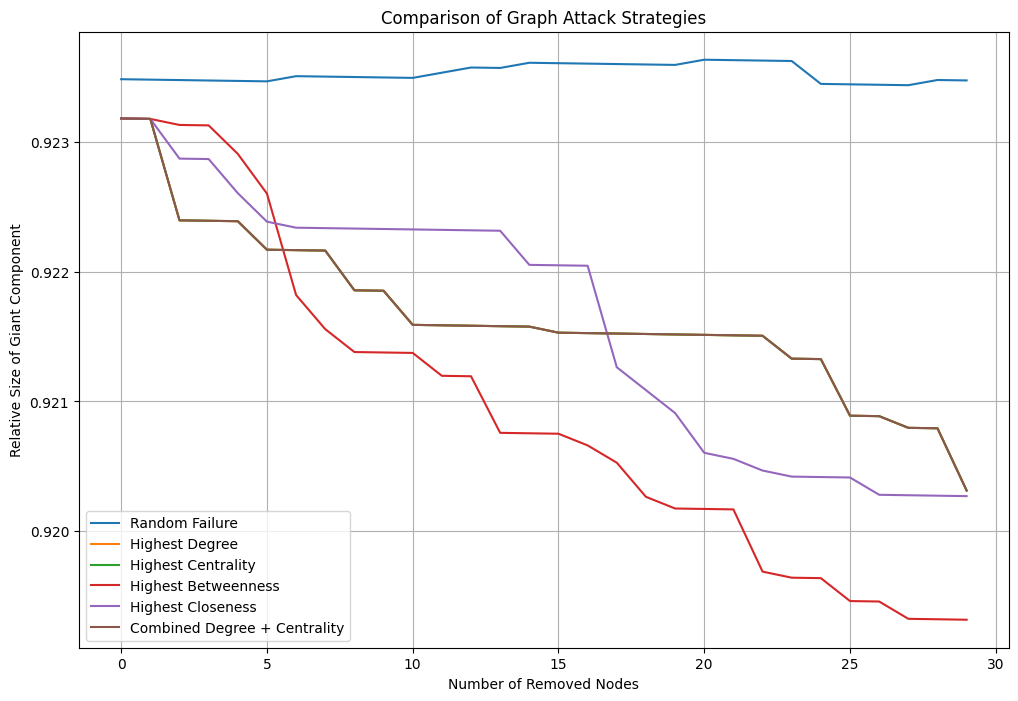

In [3]:
graph = nx.read_edgelist('CA-CondMat.txt', create_using=nx.Graph())

print(f"Loaded graph with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")

plot_attack_results(graph)

In [4]:
def analyze_graph_properties(graph: nx.Graph) -> Tuple[int, int, float]:
    """Analyzes basic properties of the graph.

    Args:
        graph (nx.Graph): The input graph.

    Returns:
        Tuple[int, int, float]: Number of nodes, number of edges, and average degree.
    """
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    average_degree = sum(dict(graph.degree()).values()) / num_nodes
    return num_nodes, num_edges, average_degree

def plot_degree_distribution(degrees: List[int], title: str, xlabel: str, ylabel: str, log_scale: bool = False):
    """Plots a histogram of node degrees.

    Args:
        degrees (List[int]): List of node degrees.
        title (str): Title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        log_scale (bool, optional): Whether to use logarithmic scale. Defaults to False.
    """
    plt.figure(figsize=(10, 6))
    plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1), edgecolor='black', alpha=0.7)
    if log_scale:
        plt.xscale('log')
        plt.yscale('log')
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.grid(True)
    plt.show()

def plot_degree_distribution_function(degrees: List[int], num_nodes: int):
    """Plots the degree distribution function.

    Args:
        degrees (List[int]): List of node degrees.
        num_nodes (int): Total number of nodes in the graph.
    """
    degree_count = Counter(degrees)
    sorted_degrees = sorted(degree_count.keys())
    probabilities = [degree_count[degree] / num_nodes for degree in sorted_degrees]

    plt.figure(figsize=(10, 6))
    plt.plot(sorted_degrees, probabilities, marker='o', linestyle='-', color='b', label='Degree Distribution')
    plt.title('Degree Distribution Function', fontsize=14)
    plt.xlabel('Node Degree', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.grid(True)
    plt.legend()
    plt.show()

Number of nodes: 23133
Number of edges: 93497
Average node degree: 8.08

Plotting degree distribution...


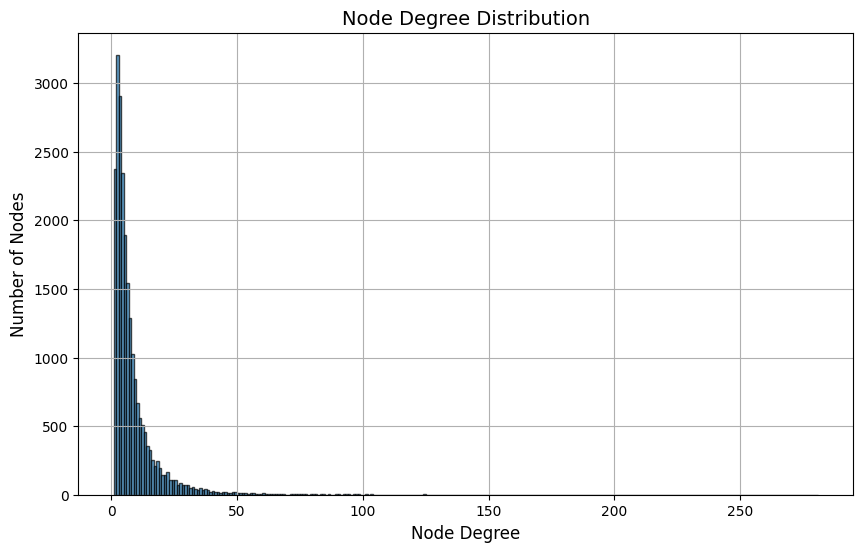


Plotting logarithmic degree distribution...


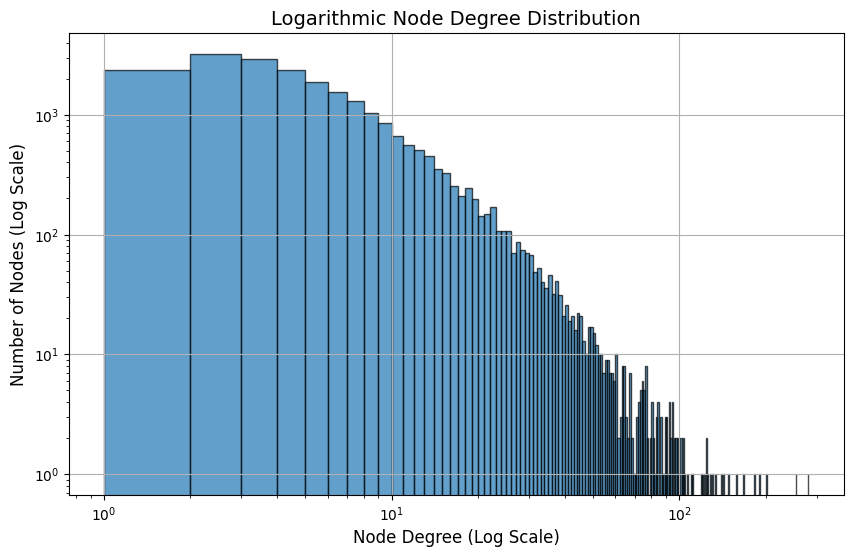


Plotting degree distribution function...


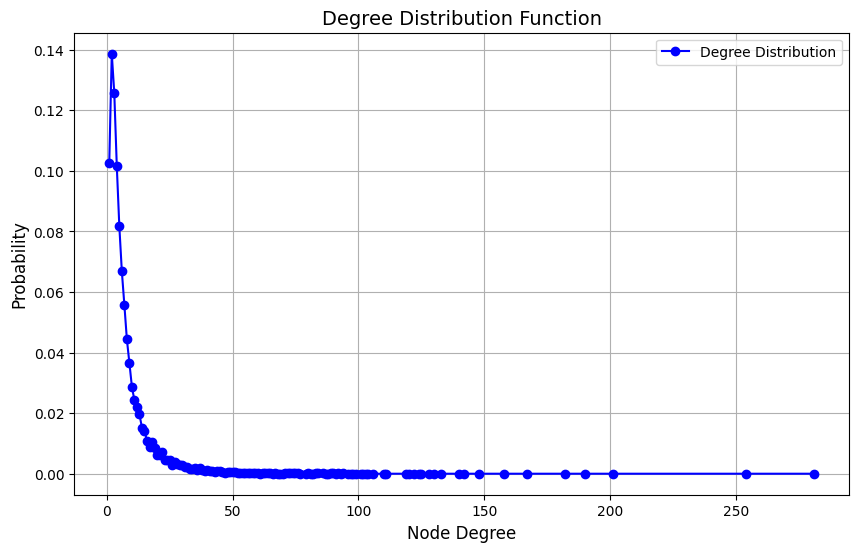

In [5]:
# Load the graph
graph_path = 'CA-CondMat.txt'
graph = nx.read_edgelist(graph_path, create_using=nx.Graph())

# Analyze graph properties
num_nodes, num_edges, avg_degree = analyze_graph_properties(graph)
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average node degree: {avg_degree:.2f}")

# Get node degrees
node_degrees = [degree for _, degree in graph.degree()]

# Plot degree distributions
print("\nPlotting degree distribution...")
plot_degree_distribution(
    node_degrees,
    title='Node Degree Distribution',
    xlabel='Node Degree',
    ylabel='Number of Nodes'
)

print("\nPlotting logarithmic degree distribution...")
plot_degree_distribution(
    node_degrees,
    title='Logarithmic Node Degree Distribution',
    xlabel='Node Degree (Log Scale)',
    ylabel='Number of Nodes (Log Scale)',
    log_scale=True
)

print("\nPlotting degree distribution function...")
plot_degree_distribution_function(node_degrees, num_nodes)